In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm

In [3]:
domain = np.arange (0.0,1.0001,0.001)

first_floor = np.repeat(1,200)
first_incline = np.arange(1,100,2)
first_decline = np.arange(100,1,-2)
middle_floor = np.repeat(1,400)
second_incline = np.arange(1,100,2)
second_decline = np.arange(100,1,-2)
second_floor = np.repeat(1,201)


prior  = np.concatenate((first_floor, first_incline, first_decline, middle_floor, second_incline, second_decline, second_floor))

prior = prior / sum(prior)

assert ( 0.999 <= sum(prior) <= 1.0001) # floating point imprecision

# Equation 5.10
def likelihood(z, N, θ):
    return (θ**z) * ((1-θ)**(N-z)) 

# Equation 5.8    
def normalization_const_n (z, N): 
    return np.sum(np.multiply (likelihood (z,N,domain), prior))

# Equation 5.7
def posterior_n (z,N):
    denominator = normalization_const_n (z, N)
    numerator = np.multiply(likelihood (z, N, domain), prior)
    return numerator / denominator 

# Equation 5.7
posterior_theta = posterior_n(14,27)

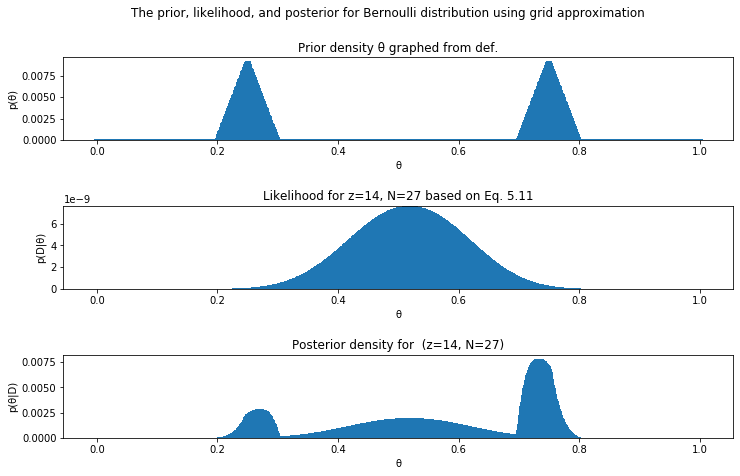

In [7]:
fig, ax = plt.subplots(3,figsize=(12,7))
fig.suptitle('The prior, likelihood, and posterior for Bernoulli distribution using grid approximation')
fig.subplots_adjust(hspace = 0.8) # add some vertical whitespace so that plots do not overlap

ax[0].set_title('Prior density θ graphed from def.')
ax[0].set_xlabel('θ')
ax[0].set_ylabel('p(θ)')
ax[0].bar(domain, prior, width=0.01)
#ax[0].axis([-0.05, 1.05, -0.0001, 0.011])

# likelihoods
ax[1].set_title('Likelihood for z=14, N=27 based on Eq. 5.11')
ax[1].set_xlabel('θ')
ax[1].set_ylabel('p(D|θ)')
ax[1].bar(domain, likelihood(14, 27, domain), width=0.01)
#ax[1].axis([-0.05, 1.05, -0.0001, 0.0000000008])

# posterior
ax[2].set_title('Posterior density for  (z=14, N=27)')
ax[2].set_xlabel('θ')
ax[2].set_ylabel('p(θ|D)')
ax[2].bar(domain, posterior_theta, width=0.01)
#ax[2].axis([-0.05, 1.05, -0.0001, 0.008])

plt.show()